# I. Lý thuyết

1) Tại sao các mô hình deep learning lại chiếm ưu thế hơn so với các mô hình machine learning truyền thống đối với dữ liệu lớn ?

**A. Do mô hình deep learning có thể được thiết kế với kích thước tùy ý nên có khả năng xấp xỉ mọi hàm số. Do đó nó có khả năng biểu diễn tốt và hoạt động hiệu quả trên dữ liệu lớn.**

B. Các mô hình machine learning thường bị overfitting đối với dữ liệu lớn ?

C. Các mô hình deep learning có chi phí huấn luyện tốn kém hơn so với machine learning.

D. Do kiến trúc của mô hình Machine Learning bao gồm nhiều layers xếp chồng.


2) Ý nghĩa của hàm loss function trong mạng neural network là gì ?

A. Là hàm số đánh giá độ chính xác của mô hình.

**B. Mục tiêu của quá trình huấn luyện là tối thiểu hóa hàm loss function bằng thuật toán gradient descent. Giá trị của hàm số này giúp đo lường mức độ khớp của dự báo từ mô hình trên dữ liệu huấn luyện.**

C. Khi loss function giảm thì luôn đảm bảo độ chính xác của mô hình tăng.

D. Là hàm số cần tối đa hóa trong quá trình huấn luyện.


3) Khi huấn luyện trên các bộ dữ liệu bigdata thì chúng ta nên sử dụng phương pháp nào ?

A) Sử dụng gradient descent trên toàn bộ dữ liệu.

B) Sử dụng stochastic gradient descent trên từng điểm dữ liệu.

**C) Mini-batch gradient descent huấn luyện mô hình trên từng tập dữ liệu con có kích thước nhỏ hơn memory CPU/GPU.**

D) Có thể sử dụng stochastic gradient descent hoặc mini-batch gradient descent.


4) Quá trình feed forward và backpropagation thực hiện những gì ?

**A) feed forward tính toán output và loss function, backpropagation tính đạo hàm trên từng layer và cập nhật trọng số.**

B) feed forward cập nhật trọng số cho mô hình, backpropagation tính toán output và loss function.

C) feed forward tính ra output của mô hình, backpropagation tính toán loss function

D) feed forward được thực hiện sau backpropagation.

5) Tác dụng của batch normalization là gì ?

A) Loại bỏ một tỷ lệ ngẫu nhiên số lượng units tại mỗi layer để tạo thành nhiều kiến trúc kết hợp ngẫu nhiên.

B) Tìm ra các tham số phân phối là trung bình và phương sai trên từng mini-batch.

C) Đồng nhất phân phối xác suất của $z^{[l]}$ trên mỗi layer $l$.

**D) Giảm thiểu ảnh hưởng của input distribution shift nhằm giúp huấn luyện loss function nhanh và ổn định hơn.**

# II. Thực hành

Xuất phát từ mô hình tốt nhất của bạn xây dựng được đối với bài toán phân loại income classification tại bài trước. Bạn hãy thực hiện một số thử nghiệm sau:

6) Thay đổi hàm loss function, batch size và optimizer.

7) Thử nghiệm thêm các layers mà bạn đã học được trong bài này vào kiến trúc của mình.

8) Thay đổi các khởi tạo trọng số theo các phân phối khác nhau và đánh giá độ chính xác của kết quả huấn luyện.

9) Thiết lập không gian search và tự động hóa tìm kiếm kiến trúc tốt nhất trên optuna.

10) Deploy model sử dụng flask ap. Tham khảo [Flaskapp tutorial](https://drive.google.com/file/d/1AZNtzrmnhJ-OBgijWoaAqXbPhJ6xL0Po/view?usp=sharing).

## Import libraries and dataset

In [ ]:
import torch 
import torch.nn as nn
import torch.utils.data as td

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Kaggle')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv('train.csv', header = 0)
data = data.drop(['ID'], axis = 1)
data.head()

,age,work_type,final_weight,education,total_education_yrs,marital_state,job,status,ethnicity,sex,capital_gain,capital_loss,hrs_per_week,nationality,target_income
0,45,Private,175925,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,M,0,0,40,US,0
1,23,Private,113601,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,M,0,0,30,US,0
2,22,Private,112137,Some-college,10,Never-married,Prof-specialty,Other-relative,Asian-Pac-Islander,F,0,0,20,South,0
3,27,Private,153078,Prof-school,15,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,M,0,0,40,US,0
4,18,Private,375515,11th,7,Never-married,Sales,Own-child,White,F,0,0,20,US,0


## Data preprocessing

In [ ]:
data = data.replace('?', np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  25000 non-null  int64 
 1   work_type            23621 non-null  object
 2   final_weight         25000 non-null  int64 
 3   education            25000 non-null  object
 4   total_education_yrs  25000 non-null  int64 
 5   marital_state        25000 non-null  object
 6   job                  23616 non-null  object
 7   status               25000 non-null  object
 8   ethnicity            25000 non-null  object
 9   sex                  25000 non-null  object
 10  capital_gain         25000 non-null  int64 
 11  capital_loss         25000 non-null  int64 
 12  hrs_per_week         25000 non-null  int64 
 13  nationality          24557 non-null  object
 14  target_income        25000 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.9+ MB


In [ ]:
data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  25000 non-null  int64 
 1   work_type            25000 non-null  object
 2   final_weight         25000 non-null  int64 
 3   education            25000 non-null  object
 4   total_education_yrs  25000 non-null  int64 
 5   marital_state        25000 non-null  object
 6   job                  25000 non-null  object
 7   status               25000 non-null  object
 8   ethnicity            25000 non-null  object
 9   sex                  25000 non-null  object
 10  capital_gain         25000 non-null  int64 
 11  capital_loss         25000 non-null  int64 
 12  hrs_per_week         25000 non-null  int64 
 13  nationality          25000 non-null  object
 14  target_income        25000 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.9+ MB


In [ ]:
# One hot encoder for category attributes
def encode_and_bind(dataframe, features_to_encode):
  dummies = pd.get_dummies(dataframe[features_to_encode])
  result = pd.concat([data, dummies], axis = 1)
  result = result.drop([features_to_encode], axis = 1)
  return result

features_to_encode = ['work_type', 'education', 'marital_state', 'job', 'status', 'ethnicity', 'sex', 'nationality']
for feature in features_to_encode:
    data = encode_and_bind(data, feature)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 106 entries, age to Yugoslavia
dtypes: int64(7), uint8(99)
memory usage: 3.7 MB


In [ ]:
data_copy = data.copy()
labels = data['target_income']
data_copy.pop('target_income')
data_X = data_copy
data_X

,age,final_weight,total_education_yrs,capital_gain,capital_loss,hrs_per_week,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,...,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,US,Vietnam,Yugoslavia
0,45,175925,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,23,113601,10,0,0,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,22,112137,10,0,0,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,27,153078,15,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,18,375515,7,0,0,20,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,47,188386,13,0,0,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
24996,23,71864,10,0,0,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
24997,24,395297,10,0,0,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
24998,44,138975,9,0,0,55,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Train test split

In [ ]:
labels = labels.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_X.values, labels, test_size = 0.3, stratify = data['target_income'], random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17500, 105) (17500,)
(7500, 105) (7500,)


In [ ]:
# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Optuna tuning

In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 2.7 MB/s 
     |████████████████████████████████| 210 kB 55.8 MB/s 
     |████████████████████████████████| 81 kB 8.2 MB/s 
     |████████████████████████████████| 75 kB 3.8 MB/s 
     |████████████████████████████████| 113 kB 42.1 MB/s 
     |████████████████████████████████| 149 kB 52.7 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=a78a5a563022f4177070445a99734ec1d48dd05645468997a7cb8e91ff8ddd6b
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna
from optuna.trial import TrialState
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
torch.manual_seed(0)

In [ ]:
train_X = torch.Tensor(X_train).float()
train_y = torch.Tensor(y_train).view(-1, 1).float()

train_ds = td.TensorDataset(train_X, train_y)
train_loader = td.DataLoader(train_ds, batch_size = 32, shuffle = True, num_workers = 1)

test_X = torch.Tensor(X_test).float()
test_y = torch.Tensor(y_test).view(-1, 1).float()
test_ds = td.TensorDataset(test_X, test_y)
test_loader = td.DataLoader(test_ds, batch_size = 32, shuffle = False, num_workers = 1)
print('Ready to load data')

Ready to load data


In [ ]:
def define_model(trial):
  n_layers = trial.suggest_int('n_layers', 2, 7)
  layers = []

  in_features = len(features)
  for i in range(n_layers):
    out_features = trial.suggest_int('u_units_l{}'.format(i), 4, 128)
    layers.append(nn.Linear(in_features, out_features))
    layers.append(nn.Sigmoid())
    p = trial.suggest_float('dropout_l{}'.format(i), 0.2, 0.7)
    layers.append(nn.Dropout(p))

    in_features = out_features

  layers.append(nn.Linear(in_features, 1))
  layers.append(nn.Sigmoid())

  return nn.Sequential(*layers)

In [ ]:
DEVICE = torch.device("cpu")
BATCHSIZE = 32
EPOCHS = 40
LOG_INTERVAL = 15
N_TRAIN_EXAMPLES = BATCHSIZE * 400
N_VALID_EXAMPLES = BATCHSIZE * 200

def objective(trial):

    # Generate the model.
    model = define_model(trial).to(DEVICE)

    # Generate the optimizers.
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "Adadelta", "SGD"])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)
    loss_criteria = nn.BCELoss()
    # Training of the model.
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            # Limiting training data for faster epochs.
            if batch_idx * BATCHSIZE >= N_TRAIN_EXAMPLES:
                break

            data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)

            optimizer.zero_grad()
            output = model(data)
            # loss = F.nll_loss(output, target)
            loss = loss_criteria(output, target)
            loss.backward()
            optimizer.step()

        # Validation of the model.
        model.eval()
        correct = 0
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(test_loader):
                # Limiting validation data.
                if batch_idx * BATCHSIZE >= N_VALID_EXAMPLES:
                    break
                data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)
                output = model(data)
                # Get the index of the max log-probability.
                pred = torch.tensor(output.data>=0.5).float()
                correct += pred.eq(target.view_as(pred)).sum().item()

        accuracy = correct / min(len(test_loader.dataset), N_VALID_EXAMPLES)

        trial.report(accuracy, epoch)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return accuracy

In [ ]:
features = data_X.columns.tolist()

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150, timeout=600)

pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-02-20 01:42:51,105] A new study created in memory with name: no-name-d51094a2-d1fb-450a-83ab-bcf18f93db3b
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
[I 2022-02-20 01:44:20,547] Trial 0 finished with value: 0.75921875 and parameters: {'n_layers': 7, 'u_units_l0': 12, 'dropout_l0': 0.22074522868484459, 'u_units_l1': 33, 'dropout_l1': 0.3427439436391131, 'u_units_l2': 77, 'dropout_l2': 0.35845989276477497, 'u_units_l3': 8, 'dropout_l3': 0.2548517803293576, 'u_units_l4': 118, 'dropout_l4': 0.4326469781273068, 'u_units_l5': 110, 'dropout_l5': 0.20205860803479786, 'u_units_l6': 23, 'dropout_l6': 0.6744007039013558, 'optimizer': 'SGD', 'lr': 0.0002268741030941148}. Best is trial 0 with value: 0.75921875.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: Us

Study statistics: 
  Number of finished trials:  21
  Number of pruned trials:  14
  Number of complete trials:  7
Best trial:
  Value:  0.858125
  Params: 
    n_layers: 2
    u_units_l0: 48
    dropout_l0: 0.2575208064971408
    u_units_l1: 54
    dropout_l1: 0.30592960151814863
    optimizer: Adam
    lr: 0.0015827071774023975


## Build model

In [ ]:
model = define_model(trial)

In [ ]:
loss_criteria = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr = trial.params['lr'])
optimizer.zero_grad()

epoch_nums = []
training_loss = []
validation_loss = []

epochs = 40

In [ ]:
def train(model, data_loader, optimizer):
    '''
    Train model through data loader and optimizer
    Args:
      model: model to train
      data_loader: data loader to manage batch loading
      optimizer: control update gradient descent
    '''
    # enable train mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        # reset optimizer into zero
        optimizer.zero_grad()
        # feed forward to compute output and loss
        out = model(data)
        loss = loss_criteria(out, target)
        # accumulate loss
        train_loss += loss.item()
        # compute gradient descent
        loss.backward()
        # update into weight
        optimizer.step()

    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
            

In [ ]:
def test(model, data_loader):
  # Switch the model to evaluation mode
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    batch_count = 0
    for batch, tensor in enumerate(data_loader):
      batch_count += 1
      data, target = tensor
      # Get the predictions
      out = model(data)
      # Calculate the loss
      test_loss += loss_criteria(out, target).item()
      # Calculate the accuracy
      # _, predicted = torch.max(out.data, 1)
      predicted = out.data > 0.5
      correct += torch.sum(target==predicted).item()

  # Calculate the average loss and total accuarcy for this epoch
  avg_loss = test_loss / batch_count
  print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
  return avg_loss

In [ ]:
# training through epoch
for epoch in range(1, epochs + 1):
    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch: 1
Training set: Average loss: 0.285559
Validation set: Average loss: 0.316554, Accuracy: 6449/7500 (86%)

Epoch: 2
Training set: Average loss: 0.286198
Validation set: Average loss: 0.314157, Accuracy: 6448/7500 (86%)

Epoch: 3
Training set: Average loss: 0.284789
Validation set: Average loss: 0.316271, Accuracy: 6437/7500 (86%)

Epoch: 4
Training set: Average loss: 0.286365
Validation set: Average loss: 0.315783, Accuracy: 6442/7500 (86%)

Epoch: 5
Training set: Average loss: 0.283224
Validation set: Average loss: 0.316776, Accuracy: 6441/7500 (86%)

Epoch: 6
Training set: Average loss: 0.283643
Validation set: Average loss: 0.317750, Accuracy: 6435/7500 (86%)

Epoch: 7
Training set: Average loss: 0.284083
Validation set: Average loss: 0.318052, Accuracy: 6437/7500 (86%)

Epoch: 8
Training set: Average loss: 0.281116
Validation set: Average loss: 0.318582, Accuracy: 6435/7500 (86%)

Epoch: 9
Training set: Average loss: 0.283331
Validation set: Average loss: 0.318718, Accuracy: 

## Evaluate model

In [ ]:
def get_metrics(y_test, predictions):
  print('ACCURACY_SCORE: ', accuracy_score(y_test, predictions))
  print('F1_SCORE: ', f1_score(y_test, predictions))
  print('CONFUSION MATRIX: \n', confusion_matrix(y_test, predictions))
  print(classification_report(y_test, predictions))

Evaluation on test dataset
ACCURACY_SCORE:  0.8572
F1_SCORE:  0.6652078774617067
CONFUSION MATRIX: 
 [[5365  339]
 [ 732 1064]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5704
           1       0.76      0.59      0.67      1796

    accuracy                           0.86      7500
   macro avg       0.82      0.77      0.79      7500
weighted avg       0.85      0.86      0.85      7500



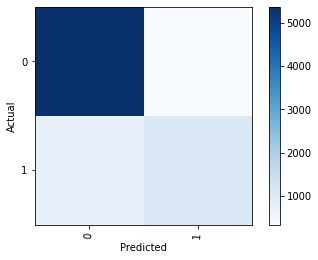

In [ ]:
def _evaluate(model, x_test):
  model.eval()
  x = torch.Tensor(x_test).float()
  predictions = [1 if i>0.5 else 0 for i in model(x).data]
  predictions = torch.tensor(predictions)
  print('Evaluation on test dataset')
  get_metrics(y_test, predictions)

  # Plot the confusion matrix
  classes=['0','1']
  cm = confusion_matrix(y_test, predictions.numpy())
  plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
  plt.colorbar()
  tick_marks = np.arange(2)
  plt.xticks(tick_marks, classes, rotation=85)
  plt.yticks(tick_marks, classes)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

_evaluate(model, X_test)

## Deploy model

Need to review and check for solutions

In [ ]:
# Hàm save và load file
import pickle
def _save_pkl(path, obj):
  with open(path, 'wb') as f:
    pickle.dump(obj, f)

def _load_pkl(path):
  with open(path, 'rb') as f:
    obj = pickle.load(f)
  return obj

In [ ]:
# Save model
_save_pkl('model.pkl',  model)
_save_pkl('scaler.pkl', scaler)

In [ ]:
model = _load_pkl('knn.pkl')
scaler = _load_pkl('scaler.pkl')

In [ ]:
# Encoding numpy to json
import json
class NumpyEncoder(json.JSONEncoder):
    '''
    Encoding numpy into json
    '''
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        if isinstance(obj, np.int32):
            return int(obj)
        if isinstance(obj, np.int64):
            return int(obj)
        if isinstance(obj, np.float32):
            return float(obj)
        if isinstance(obj, np.float64):
            return float(obj)
        return json.JSONEncoder.default(self, obj)

In [ ]:
from PIL import Image
import numpy as np
from flask import Flask, request
import flask
import json

# Khởi tạo model.
global model 
model = None
# Khởi tạo flask app
app = Flask(__name__)

# Khai báo các route 1 cho API
@app.route("/", methods=["GET"])
# Khai báo hàm xử lý dữ liệu.
def _hello_world():
  return "Hello world"

# Khai báo các route 2 cho API
@app.route("/predict", methods=["POST"])
# Khai báo hàm xử lý dữ liệu.
def _predict():
  data = {"success": False}
  request_body = request.json()
  if request_body:
    # Lấy sepal_length
    sepal_length = request_body['sp_len']
    # Lấy sepal_width
    sepal_width = request_body['sp_wid']
    # Lấy petal_length
    petal_length = request_body['pen_len']
    # Lấy petal_width
    petal_width = request_body['pen_wid']
    # Convert sang numpy array input
    X_input = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    # Dự báo nhãn và xác suất.
    label = model.predict(X_input)
    # Dự báo phân phối xác suất
    dist_probs = model.predict_proba(X_input)
    # Truyền vào data form response
    data["probability"] = dist_probs
    data["success"] = True
    return json.dumps(data, ensure_ascii=False, cls=NumpyEncoder)

if __name__ == "__main__":
  print("App run!")
  # Load model và scaler
  model = _load_pkl('knn.pkl')
  scaler = _load_pkl('scaler.pkl')
  app.run(debug=False, host='localhost', threaded=False)

# Chưa thực hijen 6,7,8,10